In [6]:
import pandas as pd



In [10]:
df = pd.read_csv("Titanic.csv")


In [11]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape


(891, 12)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df['Survived'].value_counts(normalize=True)


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [22]:
df['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isna().sum()


np.int64(0)

In [32]:
df['HasCabin'] = df['Cabin'].notna().astype(int)
df['HasCabin'].value_counts()


HasCabin
0    687
1    204
Name: count, dtype: int64

In [35]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Age'].isna().sum()



np.int64(0)

In [38]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,NaN,1
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,NaN,1
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,NaN,0


In [45]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'].head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sex, dtype: float64

In [51]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'].value_counts(dropna=False)



Sex
NaN    891
Name: count, dtype: int64

In [52]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,NaN,1
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,NaN,1
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,NaN,0
5,6,0,3,"Moran, Mr. James",NaN,25.0,0,0,330877,8.4583,NaN,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",NaN,54.0,0,0,17463,51.8625,E46,NaN,1
7,8,0,3,"Palsson, Master. Gosta Leonard",NaN,2.0,3,1,349909,21.0750,NaN,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",NaN,27.0,0,2,347742,11.1333,NaN,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",NaN,14.0,1,0,237736,30.0708,NaN,NaN,0


In [54]:
df = pd.read_csv("Titanic.csv", encoding='utf-8', sep=',')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [55]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'].value_counts()


Sex
0    577
1    314
Name: count, dtype: int64

In [56]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'].value_counts(dropna=False)


Embarked
0.0    644
1.0    168
2.0     77
NaN      2
Name: count, dtype: int64

In [57]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].value_counts(dropna=False)


Embarked
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

In [58]:
mode_embarked = df['Embarked'].mode()[0]
mode_embarked


np.float64(0.0)

In [59]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

df['Embarked'].value_counts(dropna=False)


Embarked
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

In [62]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


df['Age'].isna().sum()


np.int64(0)

In [63]:
df['HasCabin'] = df['Cabin'].notna().astype(int)
df['HasCabin'].value_counts()


HasCabin
0    687
1    204
Name: count, dtype: int64

In [70]:
print(df.columns)
print(df['Embarked'].isna().sum())
mode_embarked = df['Embarked'].mode()
if not mode_embarked.empty:
    df['Embarked'] = df['Embarked'].fillna(mode_embarked[0])
print(df['Embarked'].value_counts(dropna=False))
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(df['Embarked'].value_counts(dropna=False))


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'HasCabin'],
      dtype='object')
891
Embarked
NaN    891
Name: count, dtype: int64
Embarked
NaN    891
Name: count, dtype: int64


In [72]:
df['Embarked'] = df['Embarked'].fillna('S')

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print(df['Embarked'].value_counts(dropna=False))


Embarked
NaN    891
Name: count, dtype: int64


In [73]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(df['Embarked'].value_counts(dropna=False))


Embarked
0    891
Name: count, dtype: int64


In [74]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Age'].isna().sum()


np.int64(0)

In [75]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64

In [77]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Age'].isna().sum()


np.int64(0)

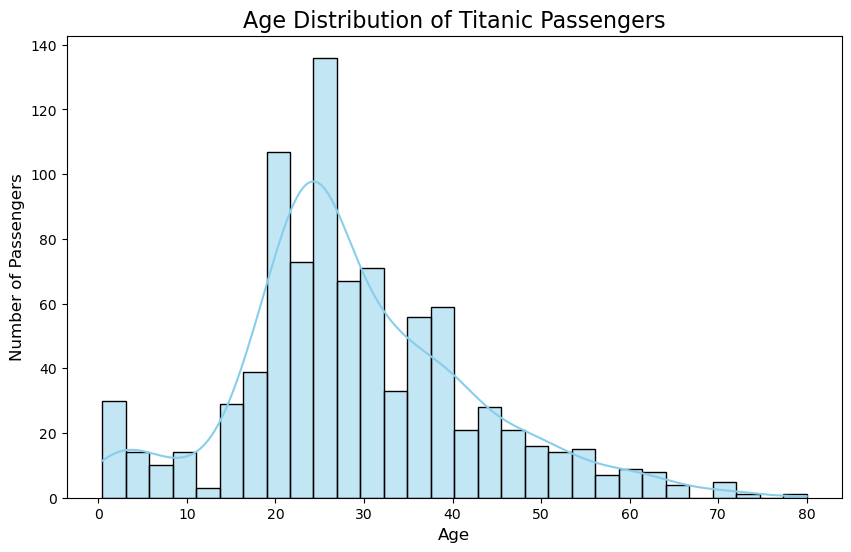

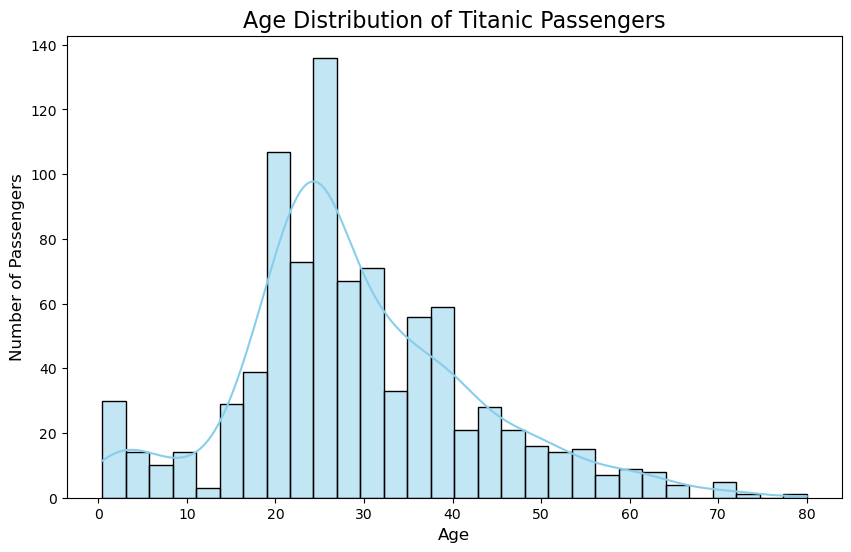

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد الرسم
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')  # histogram مع خط KDE
plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')  # histogram مع خط KDE
plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()


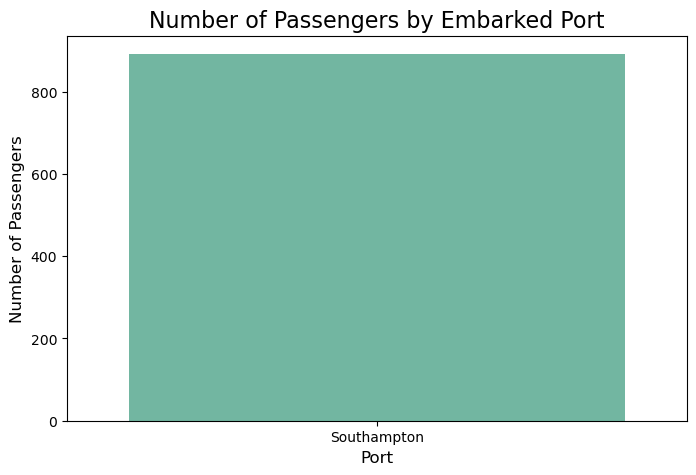

In [84]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked_name', data=df, hue='Embarked_name', palette='Set2', dodge=False, legend=False)
plt.title('Number of Passengers by Embarked Port', fontsize=16)
plt.xlabel('Port', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()


In [85]:
df['Embarked'].value_counts(dropna=False)


Embarked
0    891
Name: count, dtype: int64

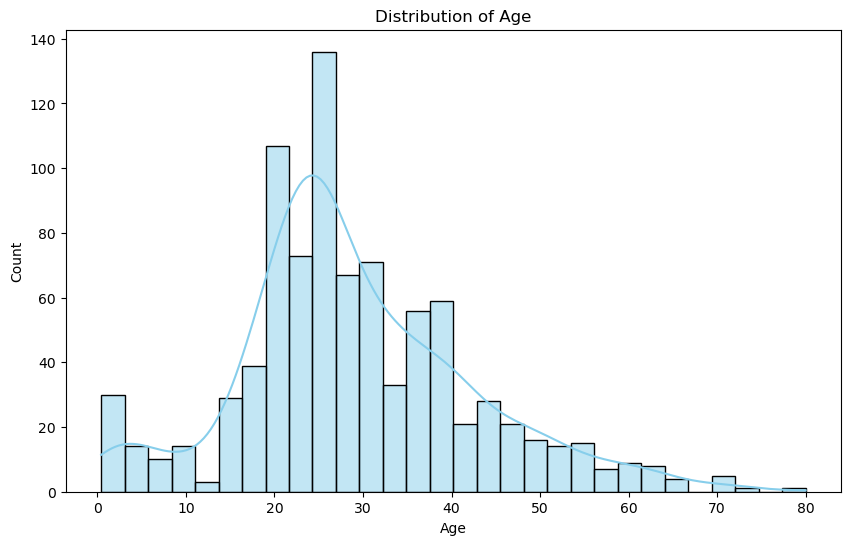

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


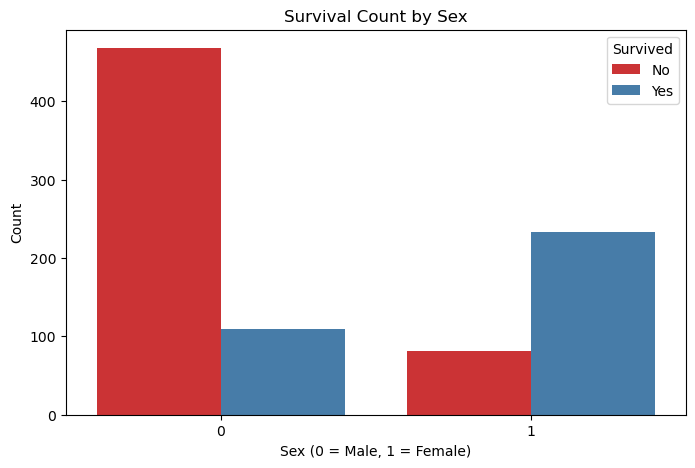

In [87]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


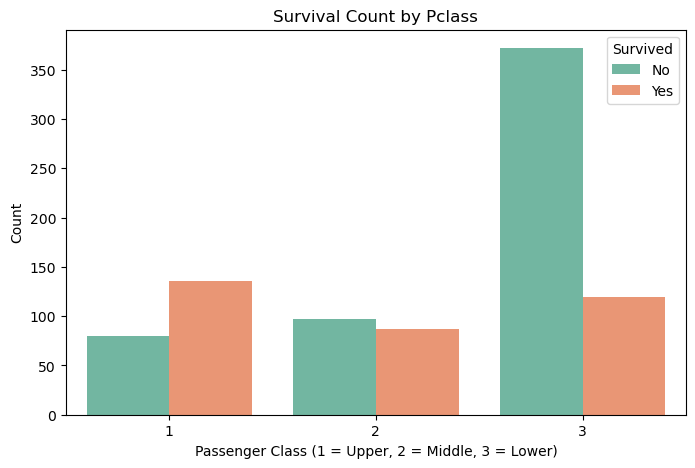

In [88]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Pclass')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


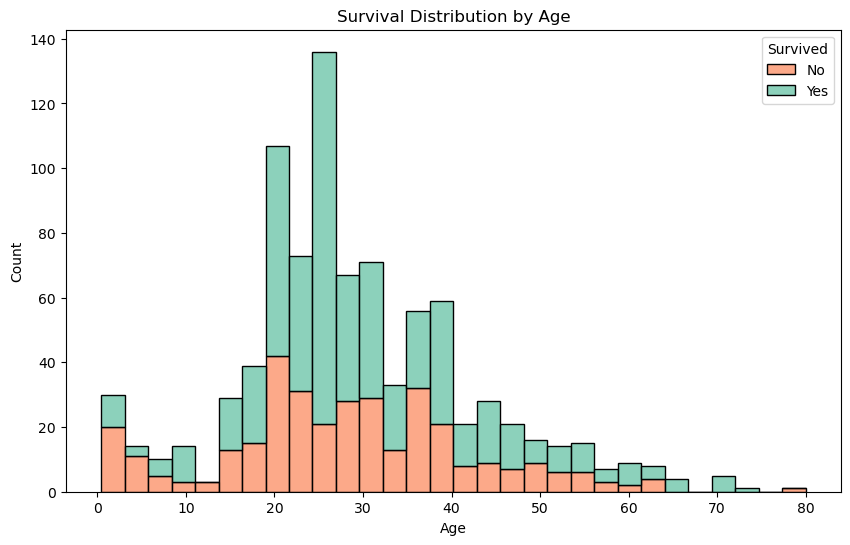

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='Set2', bins=30)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


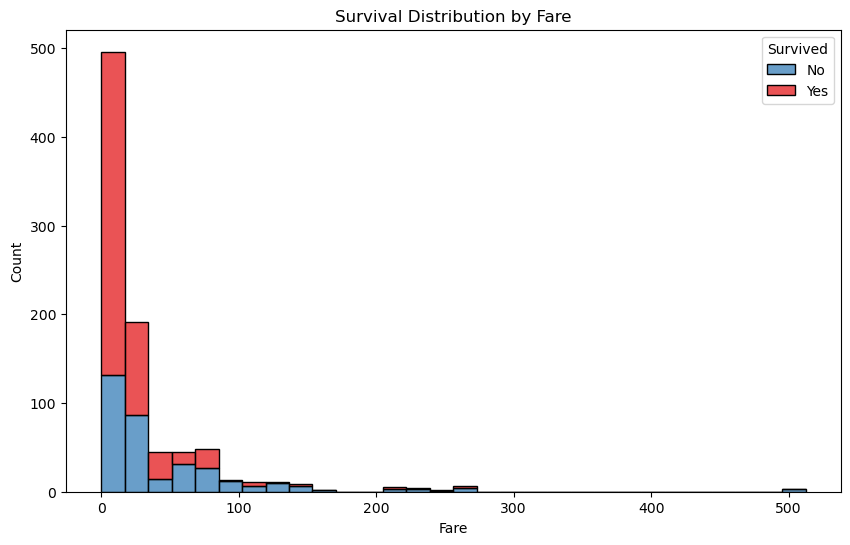

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', palette='Set1', bins=30)
plt.title('Survival Distribution by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


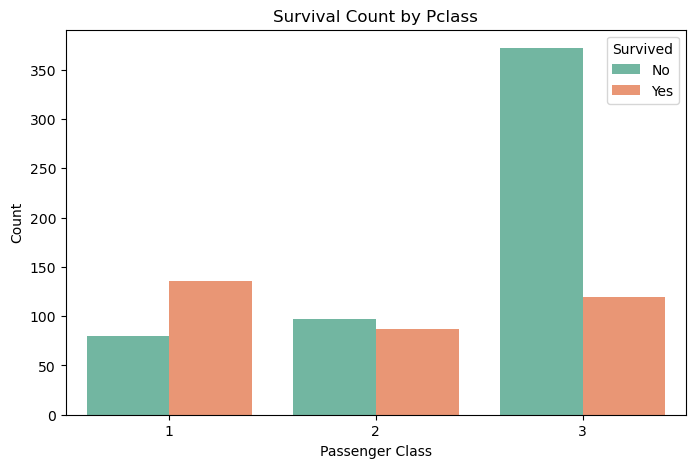

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


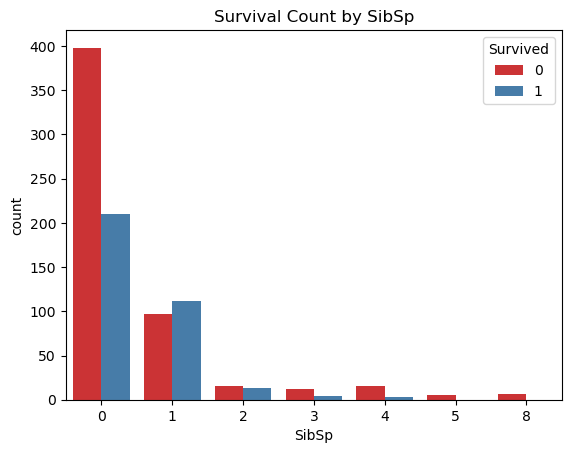

In [95]:
sns.countplot(x='SibSp', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by SibSp')
plt.show()


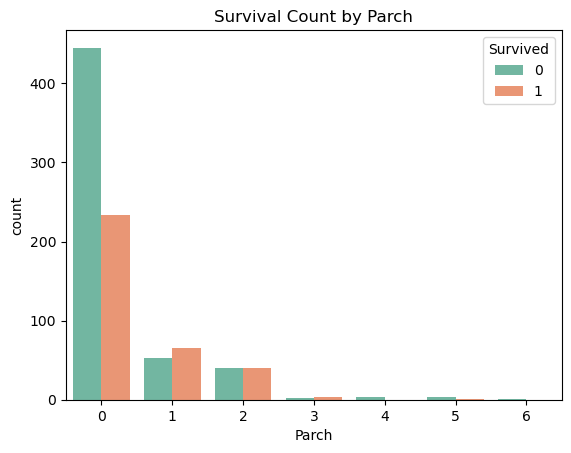

In [96]:
sns.countplot(x='Parch', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Parch')
plt.show()


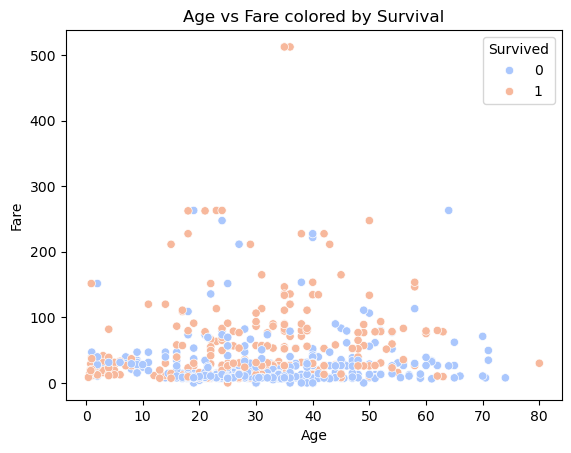

In [99]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Age vs Fare colored by Survival')
plt.show()


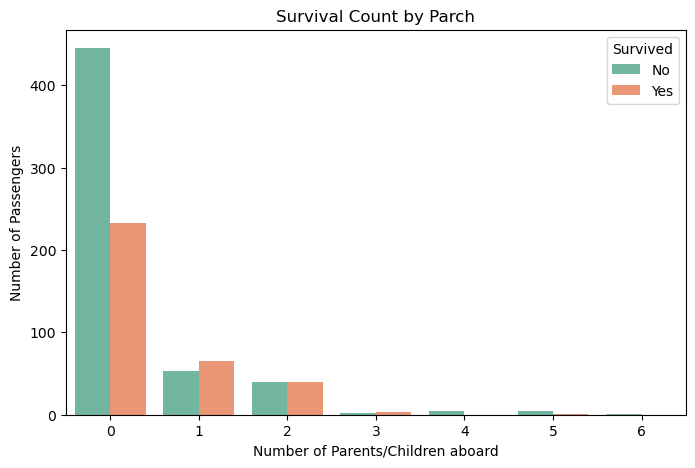

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(x='Parch', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Parch')
plt.xlabel('Number of Parents/Children aboard')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


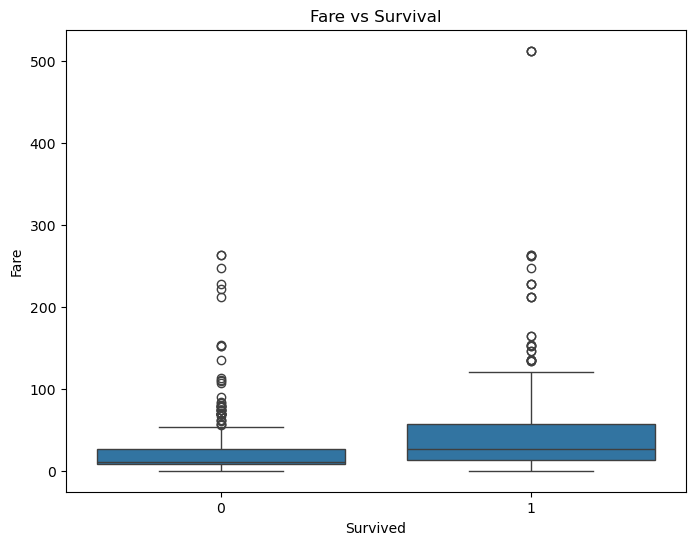

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()


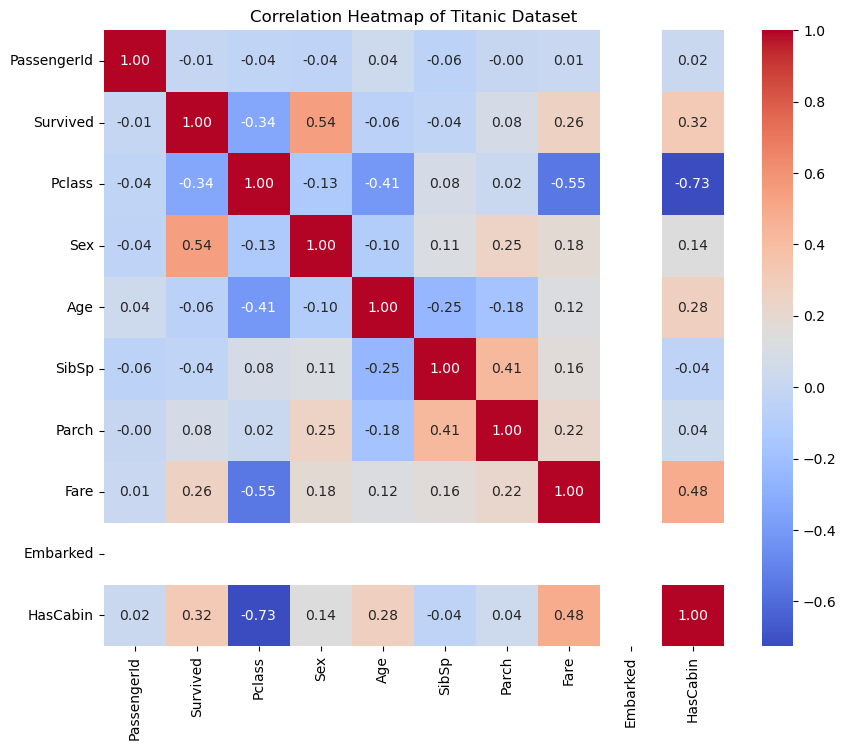

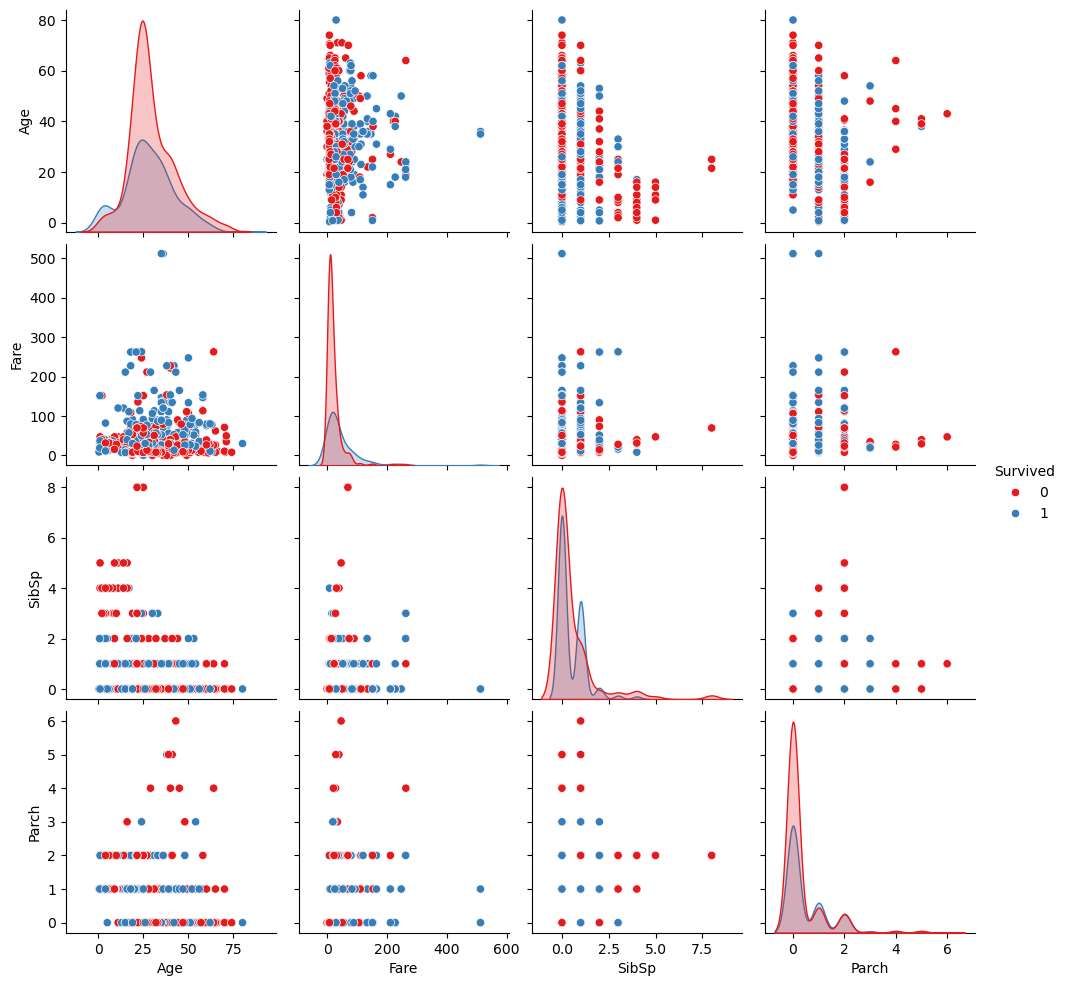

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Heatmap للعلاقات بين الأعمدة الرقمية
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp', 'Parch'], hue='Survived', palette='Set1')
plt.show()


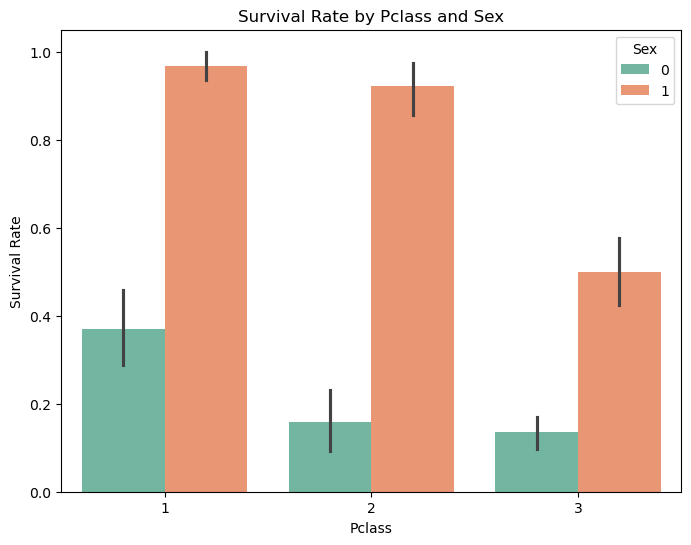

In [109]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Rate')
plt.show()


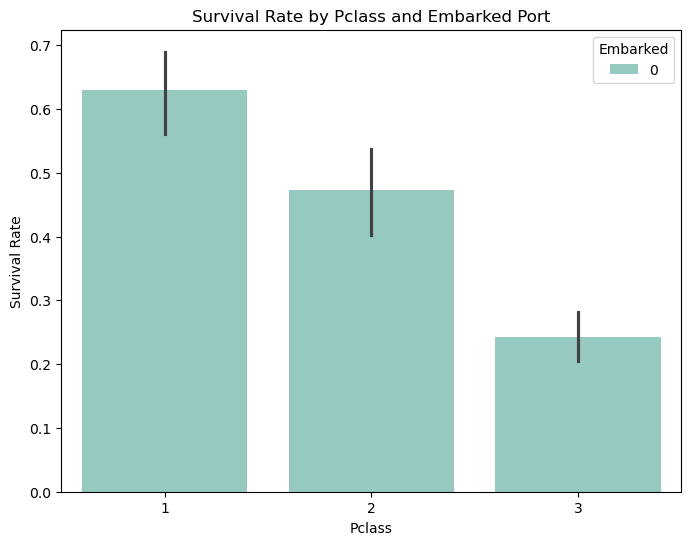

In [110]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=df, palette='Set3')
plt.title('Survival Rate by Pclass and Embarked Port')
plt.ylabel('Survival Rate')
plt.show()
